In [1]:
%run Data_Science_Preprocessing.ipynb

2020-11-01 21:30:25 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-11-01 21:30:25 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-01 21:30:25 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-11-01 22:18:50 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


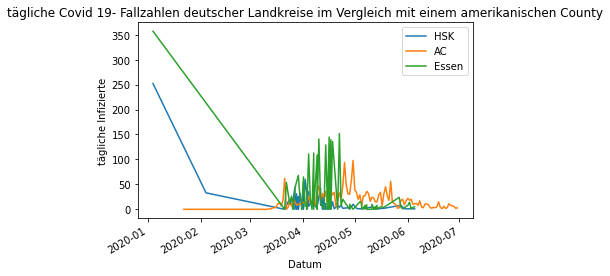

In [79]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

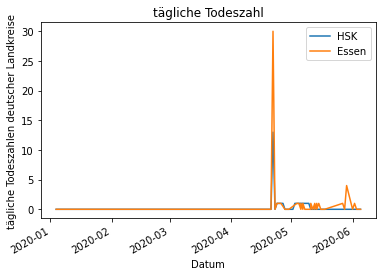

In [4]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

Text(0.5, 1.0, 'Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

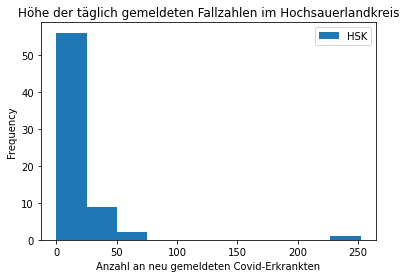

In [5]:
ax = plt.gca()

d['Hochsauerlandkreis'].plot(kind='hist', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
ax.set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten')
ax.set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')


Zeigt an dass die meisten täglichen Meldungen Meldungen mit zwischen 0 und 25 neue Infizierten hatten
Hat nicht so geklappt wie es sollte (Sollte zsmhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen)

2020-11-01 21:31:54 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 21:31:54 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 21:31:55 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 21:31:55 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


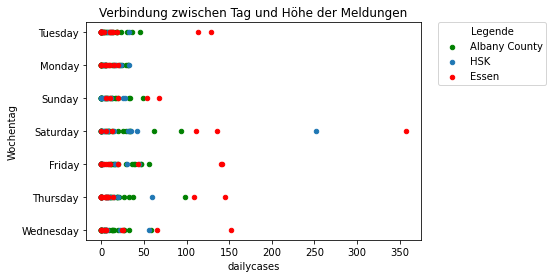

In [6]:
ax = plt.gca()
dic['Albany County'].plot(kind='scatter', x = 'dailycases', y= 'Weekday', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
_=ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [7]:
import datetime as dt
import statsmodels.formula.api as smf

In [8]:
# bundzuwachsraw_1 Werte der Bundesländer bis zum 30.06
# bundzuwachsraw_2 Werte der Bundesländer ab de0 01.07
# Das Datum muss in einen Float umgewandelt werden um damit rechnen zu können
bundzuwachsraw_1['date'] = bundzuwachsraw_1.index
bundzuwachsraw_1['datef'] = pd.to_datetime(bundzuwachsraw_1['date'])
bundzuwachsraw_1['datef']=bundzuwachsraw_1['datef'].map(dt.datetime.toordinal)
bundzuwachsraw_2['date'] = bundzuwachsraw_2.index
bundzuwachsraw_2['datef'] = pd.to_datetime(bundzuwachsraw_2['date'])
bundzuwachsraw_2['datef']=bundzuwachsraw_2['datef'].map(dt.datetime.toordinal)

In [9]:
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmges = smf.ols(formula='Gesamt ~ datef', data=bundzuwachsraw_1).fit()
predges = lmges.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictiongesamt'] = predges

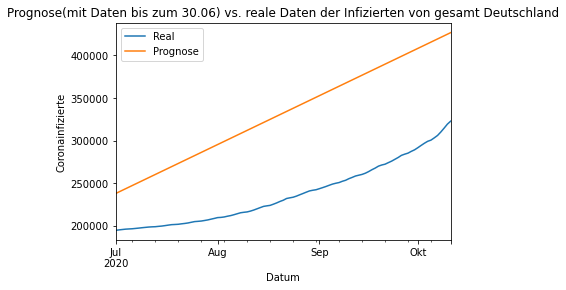

In [10]:
ax = plt.gca()
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'Gesamt', ax=ax, label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictiongesamt', ax=ax, label="Prognose")
ax.set_title('Prognose(mit Daten bis zum 30.06) vs. reale Daten der Infizierten von gesamt Deutschland')
ax.set_xlabel('Datum')
ax.set_ylabel('Coronainfizierte')
plt.show()

Man kann sehr gut sehen, dass die realen Daten unter der Prognose liegen, somit kann man sagen, dass es in Deutschland keine exponentielle Steigung der Coronainfizierten gab.

In [80]:
import geopandas as gpd
bundesland_capital = pd.read_csv('bundcap.csv')
bundesland_capital = gpd.GeoDataFrame(bundesland_capital, geometry=gpd.points_from_xy(bundesland_capital.Longitude, bundesland_capital.Latitude))
bundesland_capitalname = bundesland_capital 

2020-11-01 22:18:57 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000001FE54AE7D48>
2020-11-01 22:18:57 [fiona.env] DEBUG: Starting outermost env
2020-11-01 22:18:57 [fiona.env] DEBUG: No GDAL environment exists
2020-11-01 22:18:57 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x000001FE5291FB08> created
2020-11-01 22:18:57 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-01 22:18:57 [fiona._env] DEBUG: All drivers registered.
2020-11-01 22:18:57 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-01 22:18:57 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-01 22:18:57 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x000001FE5291FB08>.
2020-11-01 22:18:57 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x000001FE5291FB08> with options

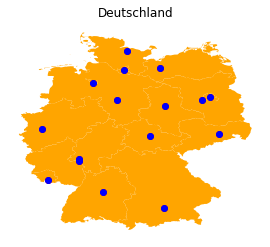

In [81]:
germap = gpd.read_file('geomap/vg2500_bld.shp')
ax = germap.plot(color='orange')

ax = bundesland_capital.plot(ax=ax, color='red')
ax = bundesland_capitalname.plot(ax=ax, color='blue') #Damit sollen eigentlich die Städtenamen angezeigt werden und keine blauen Punke


plt.rcParams['figure.figsize'] = [21, 9]
ax.set_title('Deutschland')
ax.set_axis_off()

plt.show()

Wurde nur für Tests genutzt, wird wahrscheinlich am Ende wieder gelöscht

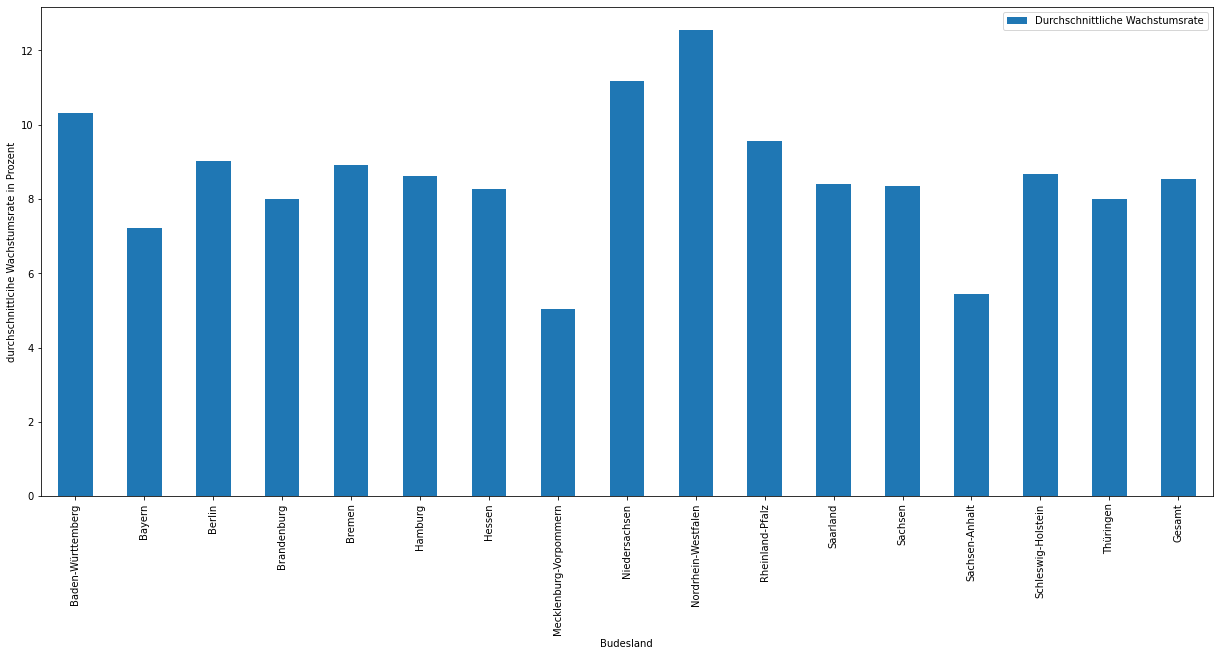

In [13]:
bars = durchwachstumfnl.plot.bar(x = 'Bundesland', y = 'AGR',label='Durchschnittliche Wachstumsrate',xlabel='Budesland',ylabel='durchschnittlcihe Wachstumsrate in Prozent');

2020-11-01 22:19:00 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000001FE54464708>
2020-11-01 22:19:00 [fiona.env] DEBUG: Starting outermost env
2020-11-01 22:19:00 [fiona.env] DEBUG: No GDAL environment exists
2020-11-01 22:19:00 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x000001FE54464748> created
2020-11-01 22:19:00 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-01 22:19:00 [fiona._env] DEBUG: All drivers registered.
2020-11-01 22:19:00 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-01 22:19:00 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-01 22:19:00 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x000001FE54464748>.
2020-11-01 22:19:00 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x000001FE54464748> with options

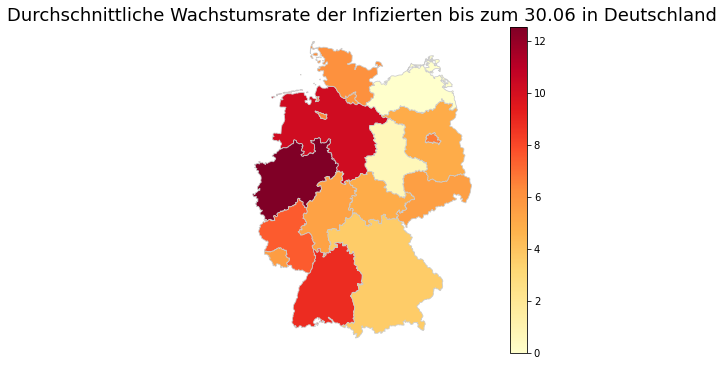

In [82]:
DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche Wachstumsrate der Infizierten bis zum 30.06 in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch NRW eine sehr hohe.

In [15]:


lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

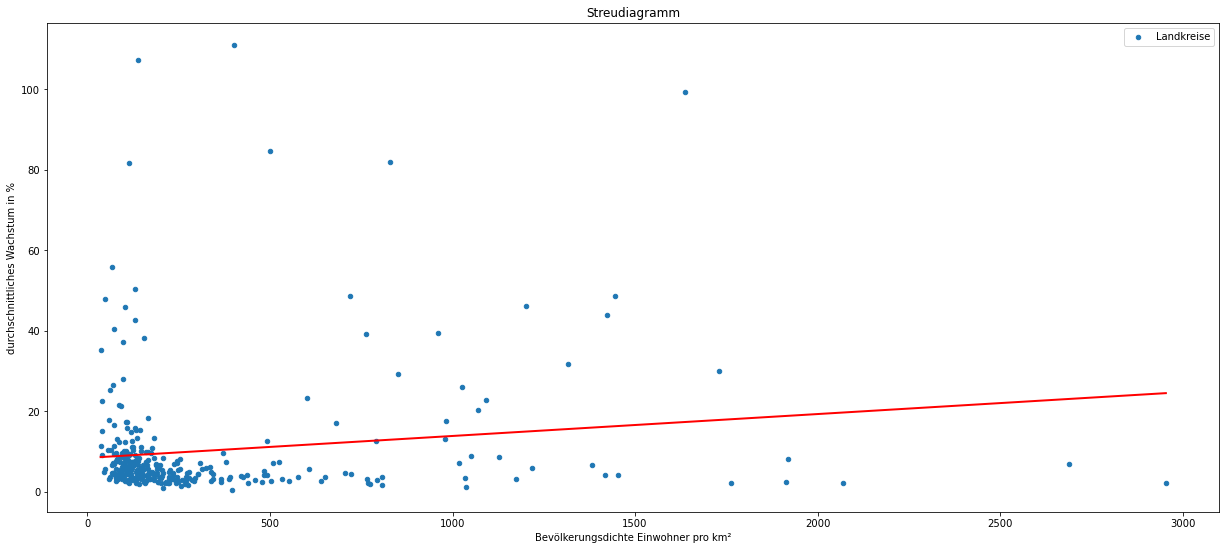

In [16]:
ax = plt.gca()
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")

plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Streudiagramm')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [17]:
lm.params

Intercept    8.384567
Dichte       0.005444
dtype: float64

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen.

In [18]:
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

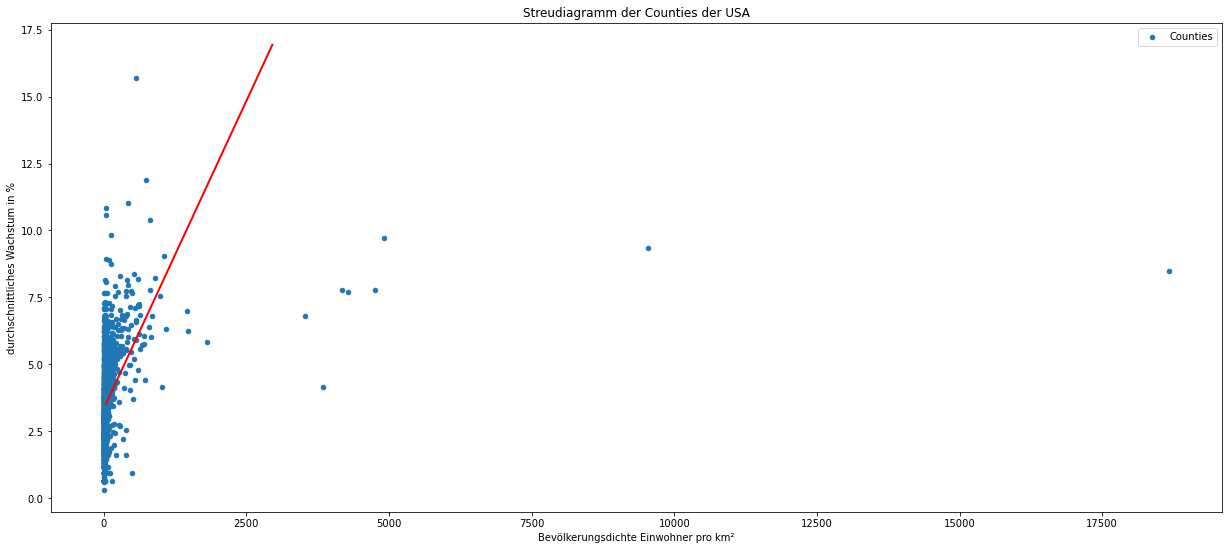

In [19]:
ax = plt.gca()

#Hiermit könnte man die 2 am meisten Bevölkerten Counties löschen, da man sie als Außreißer sehen kann
#for j in range(2):    
#    idx = DFCounty['Density'].idxmax()
#    DFCounty = DFCounty.drop(idx)
plt.plot(trend, preds2, c='red', linewidth=2)

DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax, label="Counties")
ax.set_title('Streudiagramm der Counties der USA')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [20]:
lm2.params

Intercept    3.504371
Density      0.000720
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [21]:
durchwachstumfnl.describe()

,AGR
count,17.000000
mean,8.591170
std,1.799148
min,5.034648
25%,8.006802
50%,8.540945
75%,9.025343
max,12.542029


In [22]:
compLK.describe()

,AGR,Bev.D.Ew./km²
count,322.000000,322.000000
mean,10.106238,316.279503
std,15.063383,409.852275
min,0.516924,36.000000
25%,3.515457,106.000000
50%,5.343918,160.000000
75%,9.073802,301.750000
max,110.979221,2954.000000


In [23]:
d['Hochsauerlandkreis'].describe()

,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,Rate,kumcases,dailydeaths,kumdeaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,413.058824,158.579060,4.485294,1.721966,0.017012,14.264706,2.085031,710.411765,0.264706,4.558824
std,160.697257,61.693931,7.306698,2.805142,0.116643,32.436674,10.709041,232.711226,1.589308,7.438067
min,109.000000,41.846600,0.000000,0.000000,-0.617544,0.000000,-61.754386,252.000000,0.000000,0.000000
25%,252.750000,97.034225,0.000000,0.000000,0.001647,1.000000,0.167025,482.000000,0.000000,0.000000
50%,449.000000,172.377400,0.000000,0.000000,0.010620,5.500000,1.273942,783.000000,0.000000,0.000000
75%,560.500000,215.183775,13.250000,5.086875,0.034457,15.250000,4.486483,921.500000,0.000000,13.250000
max,609.000000,233.803600,18.000000,6.910500,0.316547,252.000000,24.460432,970.000000,13.000000,18.000000


In [24]:
DFCounty.describe()

,AGR,Area,Population,Density
count,1637.000000,1637.000000,1.637000e+03,1637.000000
mean,3.568806,2885.551909,1.233841e+05,89.552584
std,1.667224,4006.641300,4.015028e+05,590.929109
min,0.310559,67.262300,7.220000e+02,0.196519
25%,2.412748,1241.827300,1.238800e+04,6.270132
50%,3.414753,1831.414900,2.839300e+04,16.602977
75%,4.483766,2746.384200,7.925500e+04,44.615746
max,15.704115,52075.550100,1.003911e+07,18671.140601


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(compLKfnl)
y_km = km.predict(compLKfnl)

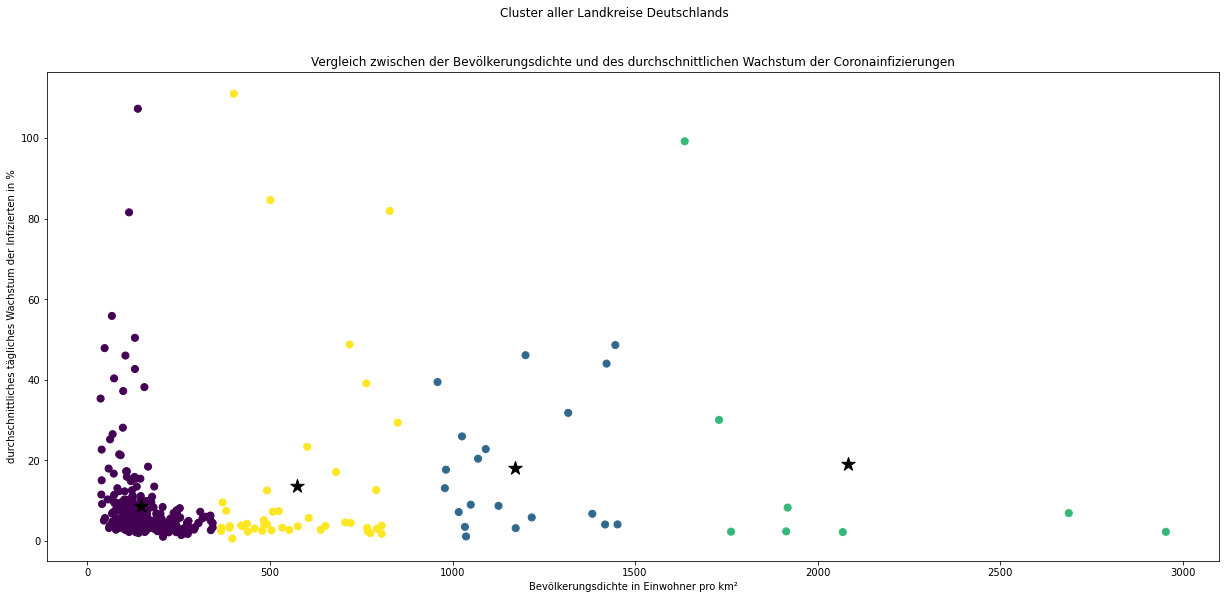

In [26]:
plt.scatter(compLKfnl["Dichte"], compLKfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster aller Landkreise Deutschlands")
plt.ylabel("durchschnittliches tägliches Wachstum der Infizierten in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Cluster des zuvor erstellen Streudiagramms mit 4 Centers

In [27]:
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population'])

#DFCountyfnl = DFCountyfnl.to_numpy()
#DFCountyfnl

In [28]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [29]:
test = pd.DataFrame()
test = DFCountyfnl
test['Typ'] = 0
test = test.rename(columns={'Density':'Dichte'})
test2 = pd.DataFrame()
test2 = compLKfnl
test2['Typ'] = 1
test = test.append(test2)

In [30]:
y = test['Typ'].to_numpy()
X = test[['AGR','Dichte']].to_numpy()

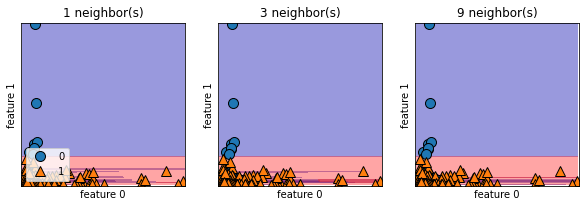

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

In [32]:
print("Test set score: {:.5f}".format(score))
print("Test set predictions:\n{}".format(pred))

Test set score: 0.86939
Test set predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0

Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot 

In [69]:
from sklearn.metrics import r2_score
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmbay = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predbay = lmbay.predict(bundzuwachsraw_2['datef']).to_numpy()
BAY = bundzuwachsraw_2['BY'].to_numpy()

lmnw = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
prednw = lmnw.predict(bundzuwachsraw_2['datef']).to_numpy()
NW = bundzuwachsraw_2['NW'].to_numpy()

#Bestimmtheitsmaß von Bayern und NRW
scoreby = r2_score(BAY,predbay)
scorenw = r2_score(NW,prednw)

print("Bayern: ",scoreby, ' NRW: ',scorenw)

Bayern:  -15.22441027335817  NRW:  -1.1313561344367402


Man sieht dass die angeführten Prognosen in NRW mehr auf die Realität passen als die in Bayern, da das Bestimmtheitsmaß in NRW näher an 1 liegt als das von Bayern. Beide liegen unter den Prognosen. Das ist gut, jedoch hat Bayern laut dem Bestimmtheismaßes die Epidemie besser im Griff gehabt.